In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from thinkstats2 import Pmf, Cdf, Hist

import thinkstats2
import thinkplot

In [2]:
%time drug = pd.read_csv('/home/ssajjala/NSDUH_2017.txt', sep='\t', header=0)

<string>:2: DtypeWarning: Columns (2502) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 10.4 s, sys: 532 ms, total: 10.9 s
Wall time: 11.3 s


In [3]:
drug.shape

(56276, 2668)

In [4]:
%time drug.describe()

CPU times: user 7.25 s, sys: 112 ms, total: 7.36 s
Wall time: 7.35 s


,QUESTID2,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,CG30EST,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP4,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
count,5.627600e+04,56276.000000,56276.000000,56276.000000,56276.000000,56276.000000,56276.000000,56276.000000,56276.000000,56276.000000,...,55891.000000,56276.000000,56276.000000,56276.000000,56276.000000,56276.000000,56276.000000,56276.000000,56276.000000,56276.000000
mean,5.440679e+07,1.514802,78.576889,78.590643,523.781452,9819.480329,92.930059,48.179330,78.938180,92.925972,...,2.404681,2.196549,2.219116,1.662627,1.756486,1.982213,1.982142,4835.157707,40025.520328,1.498809
std,2.559656e+07,0.499785,39.070097,39.050601,487.140097,1169.378109,13.028272,44.135195,27.744209,4.503609,...,0.785161,5.024707,5.021526,0.626196,0.768816,0.132179,0.132438,5829.196327,14.452923,0.500003
min,1.000602e+07,1.000000,1.000000,1.000000,1.000000,2015.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.038745,40001.000000,1.000000
25%,3.195035e+07,1.000000,99.000000,99.000000,16.000000,9991.000000,91.000000,3.000000,91.000000,91.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1281.927192,40013.000000,1.000000
50%,5.430442e+07,2.000000,99.000000,99.000000,991.000000,9991.000000,91.000000,91.000000,91.000000,91.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2828.875079,40025.000000,1.000000
75%,7.617612e+07,2.000000,99.000000,99.000000,991.000000,9999.000000,99.000000,91.000000,93.000000,93.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6015.664108,40038.000000,2.000000
max,9.999816e+07,2.000000,99.000000,99.000000,997.000000,9999.000000,99.000000,91.000000,98.000000,99.000000,...,3.000000,98.000000,98.000000,3.000000,3.000000,2.000000,2.000000,90053.310988,40050.000000,2.000000


In [5]:
data_alc=drug.CADRLAST[(drug['CADRLAST'] >= 0) & (drug['CADRLAST'] <= 100)]


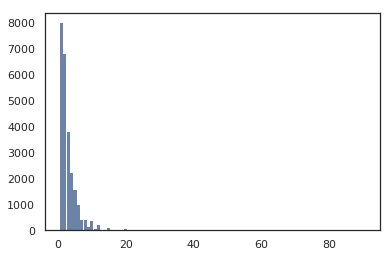

In [6]:
hist= thinkstats2.Hist(data_alc)
thinkplot.hist(hist)

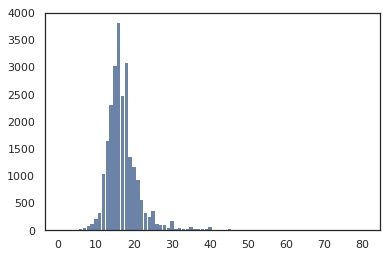

In [7]:
data_weed_only=drug.MJAGE[(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100)]
hist= thinkstats2.Hist(data_weed_only)
thinkplot.hist(hist)

Exploring the idea of which drugs show most correlation with weed use.

Coke and weed use

In [8]:
data_coke_weed=drug.COCEVER[(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100) & (drug['COCEVER'] == 1)]
data_coke_only=drug.COCEVER[(drug['COCEVER'] == 1)]

print((len(data_coke_weed)/len(data_coke_only)))#97.5% of coke users have consumed marijunana in the past

data_weed_coke=drug.MJAGE[(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100) & (drug['COCEVER'] == 1)]
print((len(data_weed_coke)/len(data_weed_only)))#Only 27% of weed users have done coke. 

print(len(data_weed_only))
print(len(data_coke_only))

0.9753891771682728
0.2738739488801932
24022
6745


In [ ]:
Coke and heroine

In [9]:
data_her_weed=drug.HEREVER[(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100) & (drug['HEREVER'] == 1)]
data_her_only=drug.HEREVER[(drug['HEREVER'] == 1)]

print((len(data_her_weed)/len(data_her_only)))#96.7% of Heroine users have consumed marijunana

data_weed_her=drug.MJAGE[(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100) & (drug['HEREVER'] == 1)]
print((len(data_her_weed)/len(data_weed_only)))#4.15% of weed users have consumed heroine

print(len(data_weed_only))
print(len(data_her_only))

0.9698736637512148
0.041545250187328284
24022
1029


Weed and LSD

In [10]:
data_lsd_weed=drug.LSD[(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100) & (drug['LSD'] == 1)]
data_lsd_only=drug.LSD[(drug['LSD'] == 1)]

print((len(data_lsd_weed)/len(data_lsd_only)))#98.1% of LSD users have consumed marijunana 

data_weed_lsd=drug.MJAGE[(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100) & (drug['LSD'] == 1)]
print((len(data_lsd_weed)/len(data_weed_only)))#4.15% of weed users have consumed LSD 

print(len(data_weed_only))
print(len(data_lsd_only))

0.9816200042744176
0.1911997335775539
24022
4679


ALcohol and weed

In [11]:
data_alc_weed=drug.ALCEVER[(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100) & (drug['ALCEVER'] == 1)]
data_alc_only=drug.ALCEVER[(drug['ALCEVER'] == 1)]

print((len(data_alc_weed)/len(data_alc_only)))#57.3% of alcohol users have consumed weed 

data_weed_alc=drug.MJAGE[(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100) & (drug['ALCEVER'] == 1)]
print((len(data_alc_weed)/len(data_weed_only)))#96.1% of weed users have consumed alcohol 
#Only 27% of weed users have done coke. 
print(len(data_weed_only))
print(len(data_alc_only))

0.573419157541679
0.9679044209474649
24022
40548


In [33]:
data_alc_weed_age=drug.ALCTRY[(drug['MJEVER'] == 1) & (drug['ALCEVER'] == 1)&(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100)&(drug['ALCTRY'] >= 0) & (drug['ALCTRY'] <= 100)]
data_weed_alc_age=drug.MJAGE[(drug['ALCEVER'] == 1)& (drug['MJEVER'] == 1)&(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100)&(drug['ALCTRY'] >= 0) & (drug['ALCTRY'] <= 100)]
data_alc_only_age=drug.ALCTRY[(drug['ALCEVER'] == 1)&(drug['ALCTRY'] >= 0) & (drug['ALCTRY'] <= 100)&(drug['MJEVER'] == 2)]
data_weed_only_age=drug.MJAGE[(drug['MJEVER'] == 1)&(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100)]
print("Age weed users have first tried alcohol" , data_alc_weed_age.mean())

print("Age Alcohol users have first tried weed" , data_weed_alc_age.mean())
print("Age Alcohol users(who have not done weed) have first tried alcohol", data_alc_only_age.mean())
print("Age Weed users(who have not done alcohol) have first tried weed" ,data_weed_only_age.mean())







Age weed users have first tried alcohol 15.662202445241284
Age Alcohol users have first tried weed 17.196180930574158
Age Alcohol users(who have not done weed) have first tried alcohol 18.27062133365258
Age Weed users(who have not done alcohol) have first tried weed 17.149571226375823


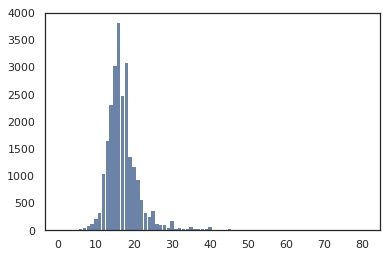

In [13]:
hist_weed=thinkstats2.Hist(data_weed_only_age)
thinkplot.hist(hist_weed)


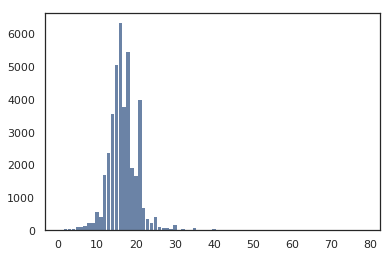

In [14]:
hist_alc=thinkstats2.Hist(data_alc_only_age)
thinkplot.hist(hist_alc)

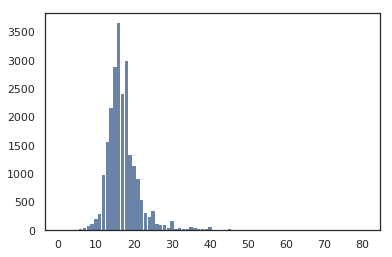

In [15]:
hist_weed_alc=thinkstats2.Hist(data_weed_alc_age)
thinkplot.hist(hist_weed_alc)

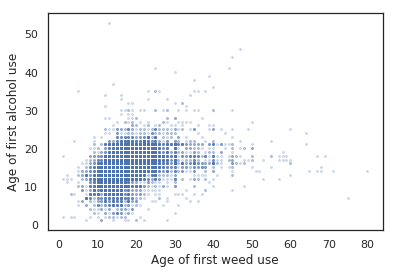

In [18]:
import matplotlib.pyplot as plt


plt.plot(data_weed_alc_age, data_alc_weed_age, 'o', markersize='2', alpha=0.2)

plt.xlabel('Age of first weed use')
plt.ylabel('Age of first alcohol use');


In [34]:
data_coc_weed_age=drug.COCAGE[(drug['MJEVER'] == 1) & (drug['COCEVER'] == 1)&(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100)&(drug['COCAGE'] >= 0) & (drug['COCAGE'] <= 60)]
data_weed_coc_age=drug.MJAGE[(drug['COCEVER'] == 1)& (drug['MJEVER'] == 1)&(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100)&(drug['COCAGE'] >= 0) & (drug['COCAGE'] <= 60)]
data_coc_only_age=drug.COCAGE[(drug['COCEVER'] == 1)&(drug['COCAGE'] >= 0) & (drug['COCAGE'] <= 100)&(drug['MJEVER'] == 2)]
data_weed_only_age=drug.MJAGE[(drug['MJEVER'] == 1)&(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100)]
print("Age weed users have first tried coke" , data_coc_weed_age.mean())

print("Age coke users have first tried weed" , data_weed_coc_age.mean())
print("Age coke users(who have not done weed) have first tried coke", data_coc_only_age.mean())
print("Age Weed users(who have not done coke) have first tried weed" ,data_weed_only_age.mean())

Age weed users have first tried coke 20.680366692131397
Age coke users have first tried weed 15.70252100840336
Age coke users(who have not done weed) have first tried coke 22.511111111111113
Age Weed users(who have not done coke) have first tried weed 17.149571226375823


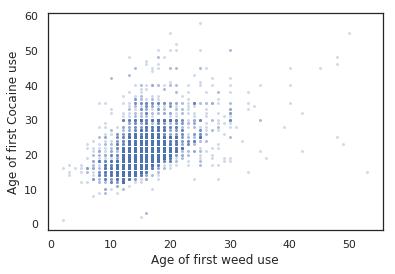

In [21]:
import matplotlib.pyplot as plt


plt.plot(data_weed_coc_age, data_coc_weed_age, 'o', markersize='2', alpha=0.2)

plt.xlabel('Age of first weed use')
plt.ylabel('Age of first Cocaine use');

In [35]:
data_her_weed_age=drug.HERAGE[(drug['MJEVER'] == 1) & (drug['HEREVER'] == 1)&(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100)&(drug['HERAGE'] >= 0) & (drug['HERAGE'] <= 60)]
data_weed_her_age=drug.MJAGE[(drug['HEREVER'] == 1)& (drug['MJEVER'] == 1)&(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100)&(drug['HERAGE'] >= 0) & (drug['HERAGE'] <= 60)]
data_her_only_age=drug.HERAGE[(drug['HEREVER'] == 1)&(drug['HERAGE'] >= 0) & (drug['HERAGE'] <= 100)&(drug['MJEVER'] == 2)]
data_weed_only_age=drug.MJAGE[(drug['MJEVER'] == 1)&(drug['MJAGE'] >= 0) & (drug['MJAGE'] <= 100)]
print("Age weed users have first tried heroine" , data_her_weed_age.mean())

print("Age heroine users have first tried weed" , data_weed_her_age.mean())
print("Age heroine users(who have not done weed) have first tried heroine", data_her_only_age.mean())
print("Age Weed users(who have not done heroine) have first tried weed" ,data_weed_only_age.mean())

Age weed users have first tried heroine 22.69838056680162
Age heroine users have first tried weed 14.246963562753036
Age heroine users(who have not done weed) have first tried heroine 24.14814814814815
Age Weed users(who have not done heroine) have first tried weed 17.149571226375823


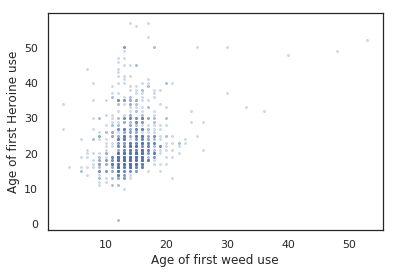

In [24]:
import matplotlib.pyplot as plt


plt.plot(data_weed_her_age, data_her_weed_age, 'o', markersize='2', alpha=0.2)

plt.xlabel('Age of first weed use')
plt.ylabel('Age of first Heroine use');